Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from random import seed
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

#Question 1.1


Step 1 - loading the dataset


In [2]:
df = pd.read_csv('abalone.data')

Step 2 - preprocessing and spliting the dataset into 8:2 of train and test

In [3]:
'''
AS regression analysis requires numerical variable , so to fit the categorical variable of column sex into our model we have to 
create dummy variables i.e M=1 F=2 I=0 
'''
df[['Sex']]=df[['Sex']].apply(lambda col:pd.Categorical(col).codes)


In [4]:
#shuffling of data to ensure iid 
np.random.seed(0)
df = df.sample(frac=1)

#Dividing the data into training and testing sets
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
split = 0.8
m = X.shape[0]
spilt_size = int(split * m)
X_train, X_test = X[:spilt_size], X[spilt_size:]
Y_train, Y_test = Y[:spilt_size], Y[spilt_size:]

Step 3 - implementing the cost and gradient descent function from scratch

In [5]:
#Cost Function
""" 
    Parameters:
    x: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    Implemented the cost function just to see the performance of model against each iteration
    """
def cost_function(x, y, w, b):
    m = len(y)
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*m))
    return cost

In [6]:
#Gradient Descent Function
"""
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: final weights
    b: final bias
    """
def gradient_descent_function(x, y, w, b, alpha=0.01, epochs=1000):
    
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # calculating y hat
        ŷ = x.dot(w) + b

        # calculating the loss
        loss = ŷ - y
        
        # calculating the gradient descent
        weight_gradient = x.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # updating weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # storing the curernt lost value
        cost = cost_function(x, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [7]:
'''At first intializing some random weights for each feature and bias and then calling the gradient descent function to get the
best model coefficients and bias
'''
#initial random weights
w = np.random.randn(X_train.shape[1])
#initial bias
b = 0
weights, bias, costs = gradient_descent_function(X_train, Y_train, w, b, epochs=2500);

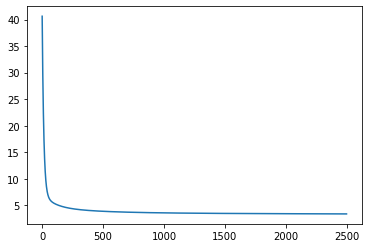

In [8]:
#to see the performance of model , plotting the costs against each iteration. 
plt.plot(costs)
plt.show()

Step 4- Evaluating the model

In [9]:
#function to find the y predicted
"""
    Parameters:
    x: features
    w: weights
    b: bias
    
    Returns:
    y_pred: predicted values

    """ 
    
def predict(x,w,b):
  return x.dot(w)+b

In [10]:
import math

# calculating RMSE
"""
    Parameters:
    y_pred: predicted values
    y: actual values
    
    Returns:
    rmse: RMSE
    """

def RMSE(y_pred, y):
  mse = np.square(np.subtract(y,y_pred)).mean()
  rmse = math.sqrt(mse)
  return rmse
    

In [11]:
#predicted values for train and test
Y_pred = predict(X_test,weights,bias)
Y_pred_from_train = predict(X_train,weights,bias)

#calculating RMSE for train and test by passing predicted and actual values
rmse_train = RMSE(Y_pred_from_train,Y_train)
rmse_test = RMSE(Y_pred,Y_test)

#printing the RMSE on training and testing data
print("RMSE for training data  : {}".format(rmse_train) +", "+ "RMSE for testing data : {}".format(rmse_test))

RMSE for training data  : 2.6020211149087733, RMSE for testing data : 2.78200861361564


#Question 1.2.a


In [16]:
 """
        
  Parameters:
  None(globally calling training and testing dataset)
  
  return:
  Best model coefficients in Lasso and ridge among 10 different values of aplha that are tried.

  As we know lower the values of RMSE indicate better fit, so i have used the minimum rmse in
  a array and then find its value of coefficient when inturn the best coef among all other. 
  
  """

def regularization():

  #different alphas to test the model
  alpha = [0.3, 0.001, 0.002, 0.01, 0.0001, 0.02, 0.1, 0.25, 0.5, 1, 4, 9]
  rmse_lasso = list()
  rmse_ridge = list()
  best_coef_lasso = list()
  best_coef_ridge =  list()

  for x in alpha :
    ridge_reg = Ridge(alpha =x)
    lasso_reg = Lasso(alpha =x)

    #training the model
    ridge_reg.fit(X_train,Y_train)
    lasso_reg.fit(X_train,Y_train)

    #calculating y predicted
    lasso_reg_pred = lasso_reg.predict(X_test) 
    ridge_reg_pred = ridge_reg.predict(X_test)

    #calculating the RMSE
    rmse_lasso.append(RMSE(lasso_reg_pred,Y_test))
    rmse_ridge.append(RMSE(ridge_reg_pred,Y_test))

    #finding the best coefficients and bias
    best_coef_lasso.append(lasso_reg.coef_)
    best_coef_ridge.append(ridge_reg.coef_)

#plotting the Alpha vs RMSE graph
  plt.xlabel('alpha')
  plt.ylabel('RMSE')
  plt.plot(alpha, rmse_ridge, marker='o',markersize=7, color='blue', label='Ridge Regression')
  plt.plot(alpha, rmse_lasso, marker='o',markersize=7, color='red', label='Lasso Regression')
  plt.xscale('log')
  plt.legend()
  plt.title("Alpha vs RMSE for both Ridge and Lasso Regression")
  
#finding the best model coefficients
  min_rmse_lasso = min(rmse_lasso)
  min_rmse_ridge = min(rmse_ridge)
  
  idx_lasso = rmse_lasso.index(min_rmse_lasso)
  idx_ridge = rmse_ridge.index(min_rmse_ridge)

  coef_lasso = best_coef_lasso[idx_lasso]
  coef_ridge =  best_coef_ridge[idx_ridge]
  # alL = alpha[idx_lasso]
  # alR = alpha[idx_ridge]
  # print(alL, alR)
  print("Best model coefficients in Lasso: ")
  print(coef_lasso)
  print("Best model coefficients in Ridge: ")
  print(coef_ridge)


0.01 1
Best model coefficients in Lasso: 
[-6.92788529e-03  0.00000000e+00  7.02251102e+00  0.00000000e+00
  4.62919697e+00 -1.35740546e+01 -0.00000000e+00  1.29932760e+01]
Best model coefficients in Ridge: 
[ 2.17702354e-04  2.00232104e+00  7.30998612e+00  1.27771640e+01
  6.96501139e+00 -1.70601236e+01 -6.65028574e+00  1.02662711e+01]


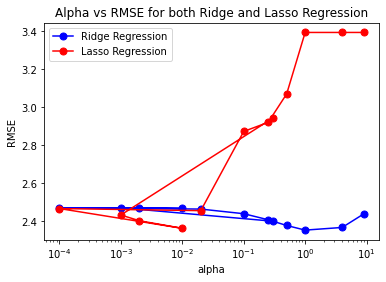

In [17]:
#calling the regularization function
regularization()

#Question 1.2.b

In [14]:
# performing Lasso and ridge regression using Grid search function
"""    
  Parameters:
  None(globally calling training and testing dataset)
  -------
  return:
  best alpha value and the best model coefficient for both Ridge and Lasso Regression

"""

def regularizationByGrid():
  alphas = np.array([0.3, 0.001, 0.002, 0.01, 0.0001, 0.02, 0.1, 0.25, 0.5, 1, 4, 9])
  
  ridge_reg = Ridge()
  lasso_reg = Lasso()
  
  grid_lasso = GridSearchCV(estimator= lasso_reg, param_grid=dict(alpha=alphas))
  grid_ridge = GridSearchCV(estimator= ridge_reg, param_grid=dict(alpha=alphas))

  #training the model
  grid_ridge.fit(X_train,Y_train)
  grid_lasso.fit(X_train,Y_train)
  
  """
  
  Finding the best model coefficients and alpha values using best_estimator. 
  the GridSearchCV instance fitted with  best hyperparameters is stored in best_estimator_. 
  the coef_ and intercept_ are the fitted parameters of that best model.

  """
  print("Lasso best alpha : {}".format(grid_lasso.best_estimator_.alpha))
  print("Lasso best coef : {}".format(grid_lasso.best_estimator_.coef_))
  print("Ridge best alpha : {}".format(grid_ridge.best_estimator_.alpha))
  print("Ridge best alpha : {}".format(grid_ridge.best_estimator_.coef_))
  
#calling the function
regularizationByGrid()



Lasso best alpha : 0.0001
Lasso best coef : [ 1.05626470e-02 -1.81023244e+00  1.06972874e+01  2.50760776e+01
  8.98929451e+00 -1.94063956e+01 -1.09133080e+01  7.68309185e+00]
Ridge best alpha : 0.1
Ridge best alpha : [ 9.64905191e-03 -1.35158940e+00  1.04107361e+01  2.29255383e+01
  8.73339103e+00 -1.91518049e+01 -1.03794786e+01  8.16059198e+00]
